# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.128378e+01     9.520506e+00
 * time: 0.004410982131958008
     1     2.804808e+01     5.096394e+00
 * time: 0.012903928756713867
     2     1.672141e+01     2.782220e+00
 * time: 0.037663936614990234
     3     1.275619e+01     1.764146e+00
 * time: 0.05845308303833008
     4     1.206321e+01     2.591453e+00
 * time: 0.07465696334838867
     5     1.114204e+01     2.006258e+00
 * time: 0.091156005859375
     6     1.092629e+01     2.483779e+00
 * time: 0.10768795013427734
     7     1.013679e+01     1.621573e+00
 * time: 0.1242361068725586
     8     9.538139e+00     1.215726e+00
 * time: 0.14077997207641602
     9     9.174142e+00     1.150724e+00
 * time: 0.15709400177001953
    10     9.037378e+00     7.052097e-01
 * time: 0.17334413528442383
    11     8.950760e+00     6.839884e-01
 * time: 0.18970108032226562
    12     8.901615e+00     7.936725e-01
 * time: 0.20209598541259766
    13     8.872528e+00     5.376720e-01
 * time:

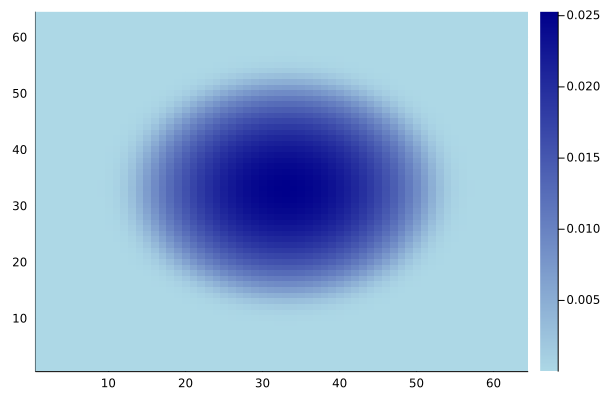

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)